# ALGORITMOS DE ORDENAÇÃO QUADRÁTICOS

### PROPOSTA:
- Utilizou-se os algoritmos quadráticos **`insertion sort`, `selection sort`, `bubble sort` e `shell sort` aplicados em um `dataset`** (arquivo "data.csv") do jogo FIFA 19.
- O arquivo **`csv`** proposto possui o registro de **18208 jogadores descritos por 89 atributos**. Para o dado problema, utilizou-se todos os registros dos jogadores filtrando os campos de interesse — ID (não sequencial), nome, foto do jogador, nacionalidade, nome do clube e logo do clube.
- O objetivo do atual `notebook` é utilizar os algoritmos de ordenação para **separar os jogadores por clubes (literais)** e, ao final, **gerar um jogador aleatório e apresentar todo o elenco do clube ao qual pertence o atleta**.
- É representado também a **comparação gráfica (histograma) dos algoritmos de ordenação** com a lista totalmente desordenada, assim como também é apresentado o desempenho dos mesmos algoritmos caso estejam passando em uma lista já ordenada.
- Ao final, é **apresentada a logo do clube e todos os jogadores que compõem o elenco com suas respectivas fotos e descrições**.

### Alunos:
- Lieverton Silva,
- Welison Regis

# IMPORTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import urllib
import time
import random

from matplotlib import pyplot as plt
from ipywidgets import IntProgress
from IPython.display import display

# SOCCER PLAYER CLASS

In [2]:
class Player:
    """Model to represent a soccer player

    Attributes:
        ID: ID of soccer player according to FIFA 19;
        name: soccer player name;
        photo: url with soccer photo;
        nationality: player nationality;
        club: club name;
        club_logo: url with club logo photo.
    """
    
    def __init__(self, ID, name, photo, nationality, flag, club, club_logo):
        self.ID = int(ID)
        self.name = name
        self.photo = photo
        self.nationality = nationality
        self.flag = flag
        self.club = club
        self.club_logo = club_logo

# READ PLAYERS FROM CSV

In [3]:
def read_csv(filename = './assets/data.csv'): 
    """Method to read specific soccer informations from csv file
    
    attributes:
        filename: path to csv file with soccer informations.
    """
    
    df = pd.read_csv(filename, usecols=['ID', 'Name', 'Photo', 'Nationality', 'Flag', 'Club', 'Club Logo'])
    
    players = []
    for index, row in df.iterrows():
        ID = int(row['ID'])
        name = row['Name']
        photo = row['Photo']
        nationality = row['Nationality']
        flag = row['Flag']
        club = str(row['Club']).strip()
        club_logo = row['Club Logo']
        
        player = Player(ID, name, photo, nationality, flag, club, club_logo)
        players.append(player)
    
    return players

In [4]:
players = read_csv()

# PLAYER INFORMATIONS

In [5]:
def plot_photo(direct_link):
    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
    
    # take photo url and increase size with replace
    direct_link = direct_link.replace(r'/2/', r'/6/')
    direct_link = direct_link.replace(r'/4/', r'/6/')
    
    try:
        request = urllib.request.Request(direct_link, headers={'User-Agent': user_agent})
        response = urllib.request.urlopen(request)
    
        image = plt.imread(response, format='PNG') # read the image file in a numpy array
        image = image.copy() # avoid read-only

        plt.imshow(image)
        plt.show()
    
    except Exception as e:
        print('\nFoto indisponível nos servidores FIFA!\n')

In [6]:
def show_player_informations(player):
    """show player informations, including photo
    
    Attributes:
        player: soccer player.
    
    
    OBS: INTERNET CONNECTION IS REQUIRED!
    """
    
    plot_photo(player.photo)
    
    print('Nome: ', player.name)
    print('ID: ', player.ID)
    print('Nacionalidade: ', player.nationality)
    print('Clube: ', player.club)

In [7]:
def show_n_players(players, n = 5):
    print('Primeiros cinco jogadores da lista:\n')
    for i, player in enumerate(players):
        if (i < n):
            show_player_informations(player)

Primeiros cinco jogadores da lista:



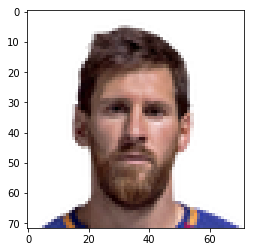

Nome:  L. Messi
ID:  158023
Nacionalidade:  Argentina
Clube:  FC Barcelona


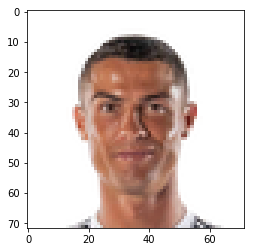

Nome:  Cristiano Ronaldo
ID:  20801
Nacionalidade:  Portugal
Clube:  Juventus


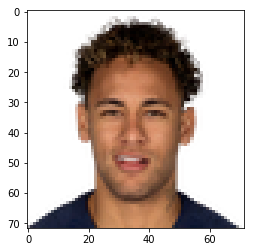

Nome:  Neymar Jr
ID:  190871
Nacionalidade:  Brazil
Clube:  Paris Saint-Germain


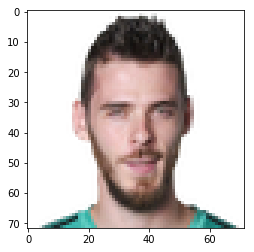

Nome:  De Gea
ID:  193080
Nacionalidade:  Spain
Clube:  Manchester United


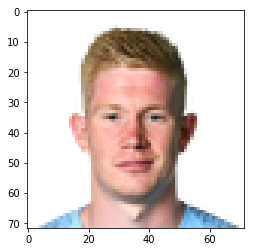

Nome:  K. De Bruyne
ID:  192985
Nacionalidade:  Belgium
Clube:  Manchester City


In [8]:
show_n_players(players, 5)

# Insertion Sort Algorithm

In [9]:
def insertion_sort(players):
    players_length = len(players)
    
    for i in range(1, players_length):
        j = i-1
        while j >= 0 and players[j].club > players[j+1].club:
            players[j], players[j+1] = players[j+1], players[j]
            
            j = j-1
            
    return players

# Selection Sort Algorithm

In [10]:
def selection_sort(players):
    players_length = len(players)
    
    for i in range(players_length):
        min_idx = i
        for j in range(i+1, players_length): 
            if players[min_idx].club > players[j].club: 
                min_idx = j 
          
        players[i], players[min_idx] = players[min_idx], players[i]
    
    return players

# Bubble Sort Algorithm

In [11]:
def bubble_sort(players):
    players_length = len(players)
    
    for i in range(players_length):
        swap = False
        for j in range(0, players_length-i-1):
            if players[j].club > players[j+1].club:
                players[j], players[j+1] = players[j+1], players[j]
                swap = True
        
        if not swap:
            break
                
    return players

# Shell Sort

In [12]:
def shell_sort(players):
    players_length = len(players) 
    gap = players_length//2
    
    while gap:
        for i in range(gap, players_length):
            tmp = players[i]
            
            j = i 
            while  j >= gap and players[j-gap].club > tmp.club: 
                players[j] = players[j-gap] 
                j -= gap
  
            # put temp (the original a[i]) in its correct location 
            players[j] = tmp
        gap //= 2
    
    return players

In [17]:
def execution_time(players, function):
    begin = time.time()
    function(players.copy())
    end = time.time()

    time_spend = end - begin
    
    return time_spend

In [24]:
def algorithms_complexity(players):
    print(">>> LOADING <<<: GENERATING GRAPHIC!")
    
    functions = [insertion_sort, selection_sort, bubble_sort, shell_sort]
    
    bar = IntProgress(min=0, max = 4, description='PROGRESS:') # instantiate the bar
    display(bar)
    
    times = []
    for function in functions:
        time_spend = execution_time(players.copy(), function)
        times.append(time_spend)
        
        bar.value += 1
    
    return times

In [25]:
def show_algorithms_complexity(times):
    plt.grid(which='major', axis='y', color='green', linewidth=0.3)
    plt.bar([1, 2, 3, 4], height=times) 
    plt.xticks([1, 2, 3, 4], ['insert','selection','bubble', 'shell'])
    plt.xlabel('sort method')
    plt.ylabel('seconds')
    
    plt.plot()

>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

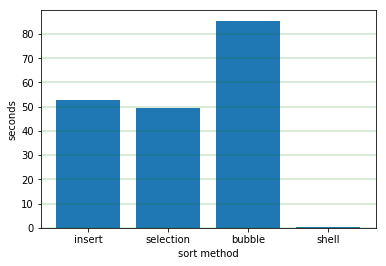

In [26]:
times = list(algorithms_complexity(players.copy()))
show_algorithms_complexity(times)

In [28]:
players = shell_sort(players.copy())

N. Theuerkauf


>>> LOADING <<<: GENERATING GRAPHIC!


IntProgress(value=0, description='PROGRESS:', max=4)

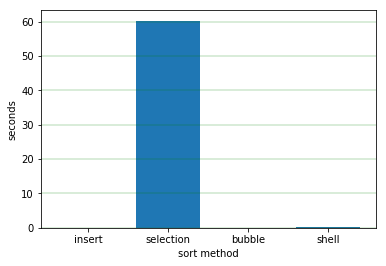

In [30]:
times2 = list(algorithms_complexity(players.copy()))
show_algorithms_complexity(times2)

In [31]:
def show_random_club(players):
    players_length = len(players)
    idx = int(random.uniform(0, players_length-1))
    up_limit = 0

    plot_photo(players[idx].club_logo)
    
    for i in range(idx,players_length):
        if players[i].club != players[idx].club:
            up_limit = i-1
            break

    for i in range(up_limit,0,-1):
        if players[i].club != players[idx].club:
            break
        show_player_informations(players[i])

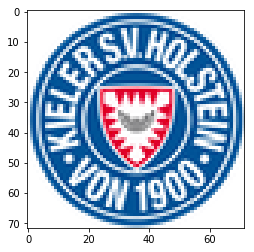

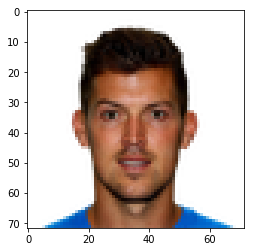

Nome:  T. Siedschlag
ID:  238689
Nacionalidade:  Germany
Clube:  Holstein Kiel


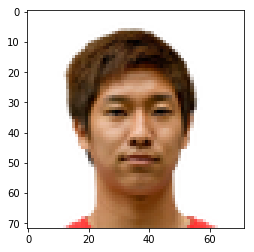

Nome:  M. Okugawa
ID:  239712
Nacionalidade:  Japan
Clube:  Holstein Kiel


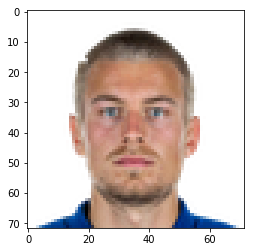

Nome:  H. Wahl
ID:  230855
Nacionalidade:  Germany
Clube:  Holstein Kiel


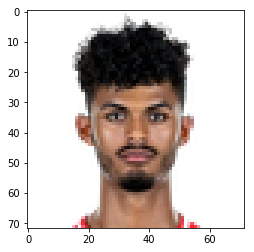

Nome:  A. Seydel
ID:  236831
Nacionalidade:  Germany
Clube:  Holstein Kiel


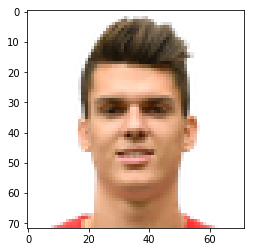

Nome:  M. Honsak
ID:  232156
Nacionalidade:  Austria
Clube:  Holstein Kiel


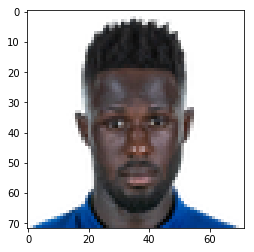

Nome:  K. Schindler
ID:  238569
Nacionalidade:  Ghana
Clube:  Holstein Kiel


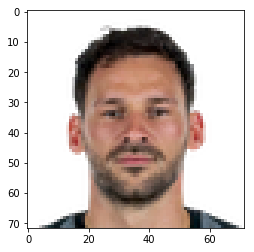

Nome:  K. Kronholm
ID:  186781
Nacionalidade:  United States
Clube:  Holstein Kiel


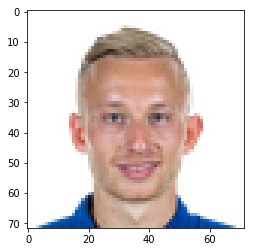

Nome:  J. Dehm
ID:  226167
Nacionalidade:  Germany
Clube:  Holstein Kiel


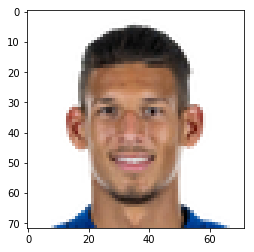

Nome:  H. Mörschel
ID:  244023
Nacionalidade:  Germany
Clube:  Holstein Kiel


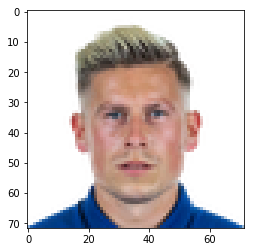

Nome:  S. Lewerenz
ID:  202662
Nacionalidade:  Germany
Clube:  Holstein Kiel


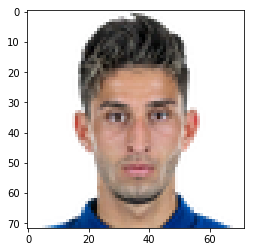

Nome:  A. Karazor
ID:  239096
Nacionalidade:  Germany
Clube:  Holstein Kiel


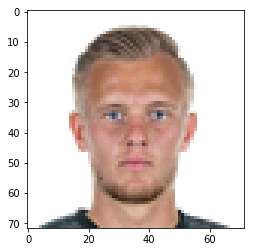

Nome:  D. Reimann
ID:  228607
Nacionalidade:  Germany
Clube:  Holstein Kiel


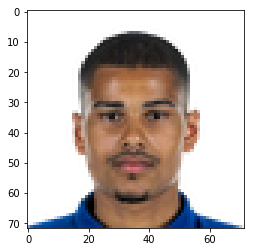

Nome:  N. Awuku
ID:  238983
Nacionalidade:  Germany
Clube:  Holstein Kiel


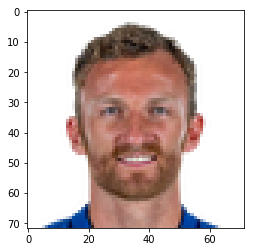

Nome:  D. Peitz
ID:  189345
Nacionalidade:  Germany
Clube:  Holstein Kiel


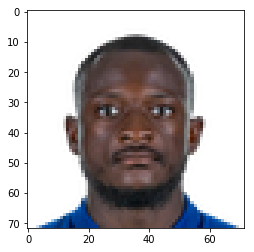

Nome:  D. Kinsombi
ID:  212625
Nacionalidade:  Germany
Clube:  Holstein Kiel


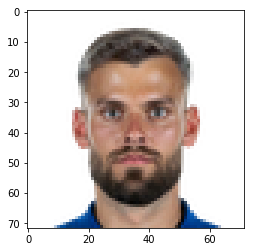

Nome:  S. Thesker
ID:  207531
Nacionalidade:  Germany
Clube:  Holstein Kiel


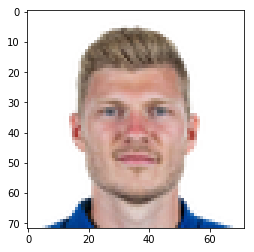

Nome:  A. Mühling
ID:  209485
Nacionalidade:  Germany
Clube:  Holstein Kiel


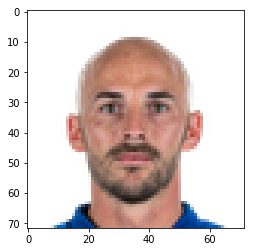

Nome:  P. Herrmann
ID:  238685
Nacionalidade:  Germany
Clube:  Holstein Kiel


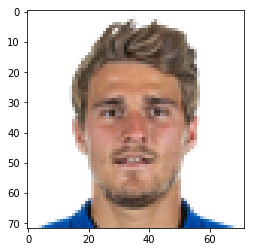

Nome:  B. Girth
ID:  238938
Nacionalidade:  Germany
Clube:  Holstein Kiel


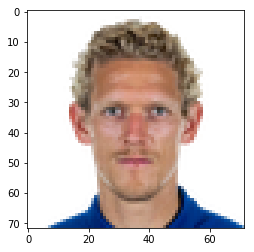

Nome:  J. van den Bergh
ID:  183490
Nacionalidade:  Germany
Clube:  Holstein Kiel


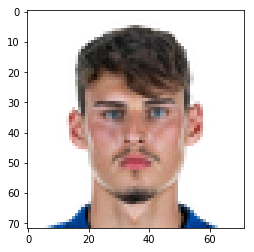

Nome:  J. Serra
ID:  232225
Nacionalidade:  Germany
Clube:  Holstein Kiel


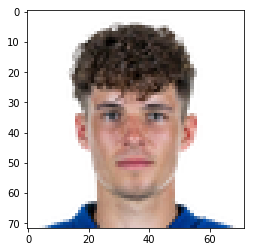

Nome:  T. Fleckstein
ID:  244000
Nacionalidade:  Germany
Clube:  Holstein Kiel


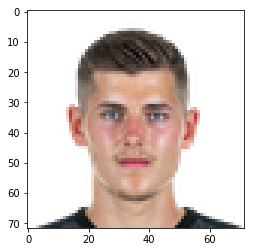

Nome:  T. Weiner
ID:  244001
Nacionalidade:  Germany
Clube:  Holstein Kiel


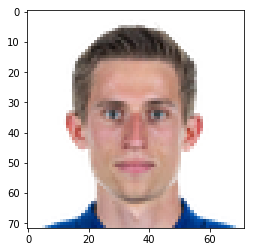

Nome:  A. Sicker
ID:  238683
Nacionalidade:  Germany
Clube:  Holstein Kiel


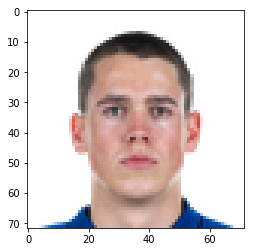

Nome:  P. Sander
ID:  243354
Nacionalidade:  Germany
Clube:  Holstein Kiel


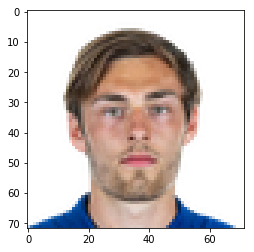

Nome:  T. Mohr
ID:  244430
Nacionalidade:  Germany
Clube:  Holstein Kiel


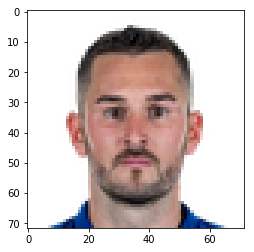

Nome:  D. Schmidt
ID:  193310
Nacionalidade:  Germany
Clube:  Holstein Kiel


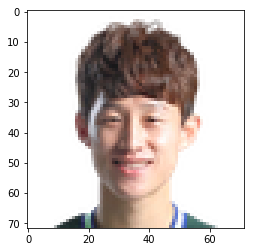

Nome:  Lee Jae Sung
ID:  221671
Nacionalidade:  Korea Republic
Clube:  Holstein Kiel


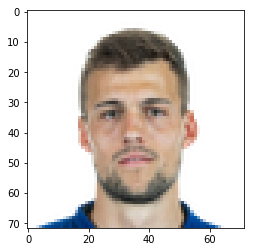

Nome:  J. Meffert
ID:  212321
Nacionalidade:  Germany
Clube:  Holstein Kiel


In [32]:
show_random_club(players)
